# [**가장 먼 노드**](https://programmers.co.kr/learn/courses/30/lessons/49189)

### **문제 설명**
n개의 노드가 있는 그래프가 있습니다. 각 노드는 1부터 n까지 번호가 적혀있습니다. 1번 노드에서 가장 멀리 떨어진 노드의 갯수를 구하려고 합니다. 가장 멀리 떨어진 노드란 최단경로로 이동했을 때 간선의 개수가 가장 많은 노드들을 의미합니다.

노드의 개수 n, 간선에 대한 정보가 담긴 2차원 배열 vertex가 매개변수로 주어질 때, 1번 노드로부터 가장 멀리 떨어진 노드가 몇 개인지를 return 하도록 solution 함수를 작성해주세요.



<br>

### **제한 사항**

- 노드의 개수 n은 2 이상 20,000 이하입니다.
- 간선은 양방향이며 총 1개 이상 50,000개 이하의 간선이 있습니다.
- vertex 배열 각 행 [a, b]는 a번 노드와 b번 노드 사이에 간선이 있다는 의미입니다.
   
<br>

#### **입출력 예**
n | vertex | return
-- | -- | --
6 | [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]] | 3

<br>

#### **입출력 예 설명**
예제의 그래프를 표현하면 아래 그림과 같고, 1번 노드에서 가장 멀리 떨어진 노드는 4,5,6번 노드입니다.

<img width="400" src="https://grepp-programmers.s3.amazonaws.com/files/ybm/fadbae38bb/dec85ab5-0273-47b3-ba73-fc0b5f6be28a.png">



---
## **Solution.py**

In [1]:
from collections import defaultdict, deque

def solution(n, edge):
    answer = []
    graph = defaultdict(set)
    for s, e in edge:
        graph[s].add(e)
        graph[e].add(s)
    
    visited = {1}
    queue = deque([[1,0]])
    max_depth = 0
    while queue:
        n, d = queue.popleft()
        nn = graph[n] - visited
        visited |= nn
        queue.extend([[i, d+1] for i in nn])
        if max_depth < d:
            max_depth = d
            answer = [n]
        elif max_depth == d:
            answer.append(n)
    return len(answer)

In [2]:
inputs = [
    (6, [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]])
]
outputs = [
    3
]

In [3]:
for idx, (i, o) in enumerate(zip(inputs, outputs)):
    print(solution(*i)==o, solution(*i), o)

True 3 3


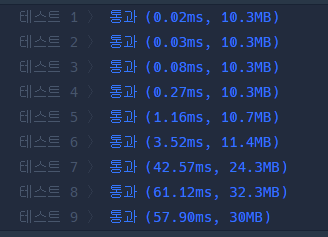

# [**메뉴 리뉴얼**](https://programmers.co.kr/learn/courses/30/lessons/72411)

### **문제 설명**

레스토랑을 운영하던 `스카피`는 코로나19로 인한 불경기를 극복하고자 메뉴를 새로 구성하려고 고민하고 있습니다.
기존에는 단품으로만 제공하던 메뉴를 조합해서 코스요리 형태로 재구성해서 새로운 메뉴를 제공하기로 결정했습니다. 어떤 단품메뉴들을 조합해서 코스요리 메뉴로 구성하면 좋을 지 고민하던 "스카피"는 이전에 각 손님들이 주문할 때 가장 많이 함께 주문한 단품메뉴들을 코스요리 메뉴로 구성하기로 했습니다.
단, 코스요리 메뉴는 최소 2가지 이상의 단품메뉴로 구성하려고 합니다. 또한, 최소 2명 이상의 손님으로부터 주문된 단품메뉴 조합에 대해서만 코스요리 메뉴 후보에 포함하기로 했습니다.

예를 들어, 손님 6명이 주문한 단품메뉴들의 조합이 다음과 같다면,
(각 손님은 단품메뉴를 2개 이상 주문해야 하며, 각 단품메뉴는 A ~ Z의 알파벳 대문자로 표기합니다.)


손님 번호 | 주문한 단품메뉴 조합
-- | --
1번 손님 | A, B, C, F, G
2번 손님 | A, C
3번 손님 | C, D, E
4번 손님 | A, C, D, E
5번 손님 | B, C, F, G
6번 손님 | A, C, D, E, H

가장 많이 함께 주문된 단품메뉴 조합에 따라 "스카피"가 만들게 될 코스요리 메뉴 구성 후보는 다음과 같습니다.

코스 종류 | 메뉴 구성 | 설명
-- | -- | --
요리 2개 코스 | A, C | 1번, 2번, 4번, 6번 손님으로부터 총 4번 주문됐습니다.
요리 3개 코스 | C, D, E | 3번, 4번, 6번 손님으로부터 총 3번 주문됐습니다.
요리 4개 코스 | B, C, F, G | 1번, 5번 손님으로부터 총 2번 주문됐습니다.
요리 4개 코스 | A, C, D, E | 4번, 6번 손님으로부터 총 2번 주문됐습니다.


<br>

### **[문제]**

각 손님들이 주문한 단품메뉴들이 문자열 형식으로 담긴 배열 orders, "스카피"가 `추가하고 싶어하는` 코스요리를 구성하는 단품메뉴들의 갯수가 담긴 배열 course가 매개변수로 주어질 때, "스카피"가 새로 추가하게 될 코스요리의 메뉴 구성을 문자열 형태로 배열에 담아 return 하도록 solution 함수를 완성해 주세요.

<br>

### **[제한사항]**

- orders 배열의 크기는 2 이상 20 이하입니다.
- orders 배열의 각 원소는 크기가 2 이상 10 이하인 문자열입니다.
   - 각 문자열은 알파벳 대문자로만 이루어져 있습니다.
   - 각 문자열에는 같은 알파벳이 중복해서 들어있지 않습니다.
- course 배열의 크기는 1 이상 10 이하입니다.
   - course 배열의 각 원소는 2 이상 10 이하인 자연수가 `오름차순`으로 정렬되어 있습니다.
   - course 배열에는 같은 값이 중복해서 들어있지 않습니다.
- 정답은 각 코스요리 메뉴의 구성을 문자열 형식으로 배열에 담아 사전 순으로 `오름차순` 정렬해서 return 해주세요.
   - 배열의 각 원소에 저장된 문자열 또한 알파벳 `오름차순`으로 정렬되어야 합니다.
   - 만약 가장 많이 함께 주문된 메뉴 구성이 여러 개라면, 모두 배열에 담아 return 하면 됩니다.
   - orders와 course 매개변수는 return 하는 배열의 길이가 1 이상이 되도록 주어집니다.

<br>

#### **입출력 예**

orders | course | result
-- | -- | --
["ABCFG", "AC", "CDE", "ACDE", "BCFG", "ACDEH"] | [2,3,4] | ["AC", "ACDE", "BCFG", "CDE"]
["ABCDE", "AB", "CD", "ADE", "XYZ", "XYZ", "ACD"] | [2,3,5] | ["ACD", "AD", "ADE", "CD", "XYZ"]
["XYZ", "XWY", "WXA"] | [2,3,4] | ["WX", "XY"]

<br>

#### **입출력 예에 대한 설명**

##### **입출력 예#1**
문제 예시와 같습니다.


##### **입출력 예#2**

AD가 세 번, CD가 세 번, ACD가 두 번, ADE가 두 번, XYZ 가 두 번 주문됐습니다.
요리 5개를 주문한 손님이 1명 있지만, 최소 2명 이상의 손님에게서 주문된 구성만 코스요리 후보에 들어가므로, 요리 5개로 구성된 코스요리는 새로 추가하지 않습니다.

##### **입출력 예#3**

WX가 두 번, XY가 두 번 주문됐습니다.
3명의 손님 모두 단품메뉴를 3개씩 주문했지만, 최소 2명 이상의 손님에게서 주문된 구성만 코스요리 후보에 들어가므로, 요리 3개로 구성된 코스요리는 새로 추가하지 않습니다.
또, 단품메뉴를 4개 이상 주문한 손님은 없으므로, 요리 4개로 구성된 코스요리 또한 새로 추가하지 않습니다.

---
## **Solution.py**

In [4]:
from collections import Counter
import itertools

def solution(orders, course):
    orders = [set(i) for i in orders]
    # print(orders)
    length = len(orders)
    answer = []
    for i in range(length):
        for j in range(i+1, length):
            inter = orders[i] & orders[j]
            if len(inter) in course and inter not in answer:
                answer.append(inter)
            
    # print(answer)
    answer = sorted([''.join(sorted(i)) for i in answer])
    return answer

In [5]:
inputs = [
    (["ABCFG", "AC", "CDE", "ACDE", "BCFG", "ACDEH"], [2,3,4]),
    (["ABCDE", "AB", "CD", "ADE", "XYZ", "XYZ", "ACD"], [2,3,5]),
    (["XYZ", "XWY", "WXA"], [2,3,4])
]
outputs = [
    ["AC", "ACDE", "BCFG", "CDE"],
    ["ACD", "AD", "ADE", "CD", "XYZ"],
    ["WX", "XY"]
]

In [6]:
for idx, (i, o) in enumerate(zip(inputs, outputs)):
    print(solution(*i)==o, solution(*i), o)

True ['AC', 'ACDE', 'BCFG', 'CDE'] ['AC', 'ACDE', 'BCFG', 'CDE']
False ['AB', 'ACD', 'AD', 'ADE', 'CD', 'XYZ'] ['ACD', 'AD', 'ADE', 'CD', 'XYZ']
True ['WX', 'XY'] ['WX', 'XY']


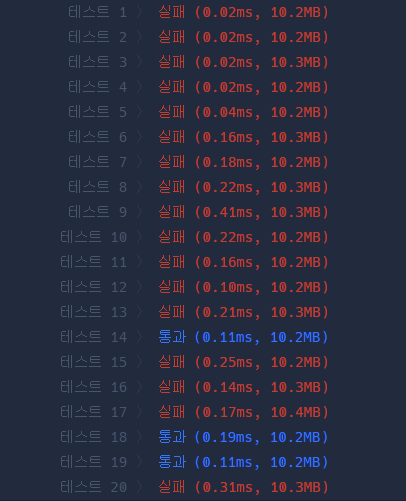